In [87]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics

## Статистическая задача

In [88]:
num_samples = 20

In [89]:
def get_uniform_samples(n):
    uniform_rv = sps.uniform(0, 10)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(uniform_rv.rvs(n))
    
    return np.array(all_samples)

In [90]:
def get_mp_ests(samples):
    mp_ests = np.zeros((num_samples))
    for i in range(len(samples)):
        mp_ests[i] = samples[i].mean()
        
    return mp_ests

In [91]:
def get_medians(samples):
    medians = np.zeros((num_samples))
    for i in range(len(samples)):
        medians[i] = np.median(samples[i])
        
    return medians

In [92]:
def get_estms_stats(esmts):
    mn = esmts.min()
    mx = esmts.max()
    w = mx - mn
    std_dev = statistics.stdev(esmts)
    
    return mn, mx, w, std_dev

def print_stats(name, n, estms):
    mn, mx, w, std = get_estms_stats(estms)
    print('n = {:d}, {}: amin = {:.2f}, amax = {:.2f}, w = {:.2f}, Sa = {:.2f}'.format(n, name, mn, mx, w, std))

In [93]:
def get_estmts_stats_for_num(n):
    samples = get_uniform_samples(n)
    moments = get_mp_ests(samples) * 2
    mp = np.array([(n+1)/n * s.max() for s in samples])
    medians = get_medians(samples) * 2
    print_stats('a1', n, moments)
    print_stats('a2', n, mp)
    print_stats('a3', n, medians)
    print()
    
    return moments, mp, medians

In [94]:
a1_10, a2_10, a3_10 = get_estmts_stats_for_num(10)
a1_40, a2_40, a3_40 = get_estmts_stats_for_num(40)
a1_160, a2_160, a3_160 = get_estmts_stats_for_num(160)

n = 10, a1: amin = 7.23, amax = 13.79, w = 6.56, Sa = 1.52
n = 10, a2: amin = 8.63, amax = 10.98, w = 2.35, Sa = 0.66
n = 10, a3: amin = 4.16, amax = 15.45, w = 11.29, Sa = 2.25

n = 40, a1: amin = 8.68, amax = 11.69, w = 3.01, Sa = 0.91
n = 40, a2: amin = 9.21, amax = 10.24, w = 1.03, Sa = 0.24
n = 40, a3: amin = 7.27, amax = 12.43, w = 5.16, Sa = 1.52

n = 160, a1: amin = 8.79, amax = 10.65, w = 1.86, Sa = 0.47
n = 160, a2: amin = 9.90, amax = 10.06, w = 0.15, Sa = 0.05
n = 160, a3: amin = 8.44, amax = 11.26, w = 2.82, Sa = 0.79



In [95]:
def draw_estms(a2, a3):
    x = np.linspace(0, num_samples, num_samples)
    plt.plot(x, a2, label='a2')
    plt.plot(x, a3, label='a3')
    plt.xlabel('Порядковый номер оценки')
    plt.ylabel('Значение оценки')
    plt.legend()

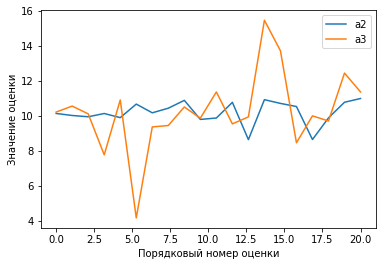

In [96]:
draw_estms(a2_10, a3_10)

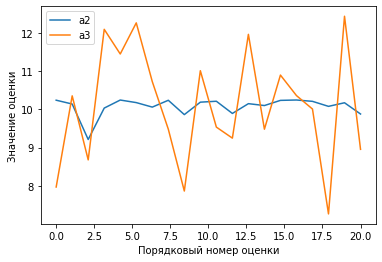

In [97]:
draw_estms(a2_40, a3_40)

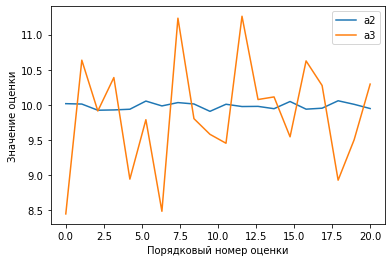

In [98]:
draw_estms(a2_160, a3_160)

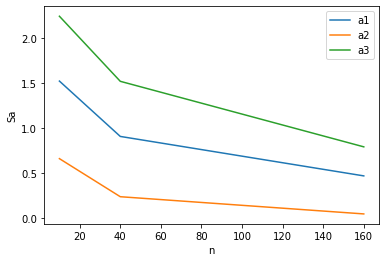

In [99]:
def get_std(list_estms):
    return list(map(statistics.stdev, list_estms))

x = [10, 40, 160]
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
y3 = get_std([a3_10, a3_40, a3_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.plot(x, y3, label='a3')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

## Задание для самостоятельной работы

### Оценка среднего нормального распределения

In [100]:
def get_normal_samples(n):
    normal = sps.norm(loc=0, scale=1)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(normal.rvs(n))
        
    return np.array(all_samples)

In [101]:
def get_estmts_stats_for_num(n):
    samples = get_normal_samples(n)
    mp = get_mp_ests(samples)
    medians = get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [102]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[-0.69356499  0.8742132   0.47689107  0.97190391 -2.66531036  0.56120629
  -0.8140842  -1.01566525 -0.94305943 -0.61143957]
 [-0.72017612  0.19646777  0.07470768  2.72605256 -1.29895154 -1.03550605
  -1.12132392  0.58303876  0.79785589  0.27161082]
 [ 0.54658114 -1.03879328 -0.01844109 -0.21709955 -0.60777401  0.07884519
  -0.85462113 -1.27903117  1.87557241 -1.10867782]
 [-0.30830059  0.28307544  0.64992024 -1.38479382 -0.14246443 -0.65848775
   0.23376394  0.49301494  0.34068704  0.03931248]
 [-0.71320569 -0.16934635  0.38924033  1.38809364 -0.12817527  1.01166609
   0.68862459  1.05871389  1.31113857  0.38415626]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [-0.38589093  0.04737759 -0.26234393 -0.04542725  0.52209061 -0.30711383
  0.60087836 -0.50093681  0.2384834  -0.44139406 -0.69079692 -0.35109472
 -0.03807173  0.02337306  0.30188742 -0.31347797 -0.17294681 -0.02803514
  0.33904643 -0.31203481]
Медианные оценки:  [-0.65250228  0.13558773 -0.41243678  0

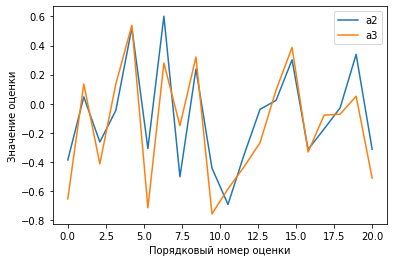

In [103]:
draw_estms(a1_10, a2_10)

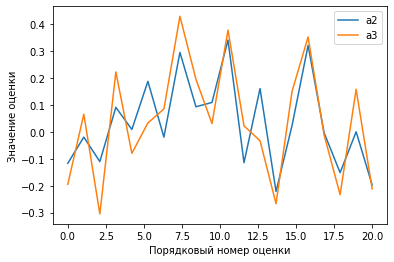

In [104]:
draw_estms(a1_40, a2_40)

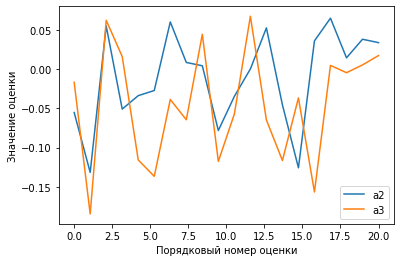

In [105]:
draw_estms(a1_160, a2_160)

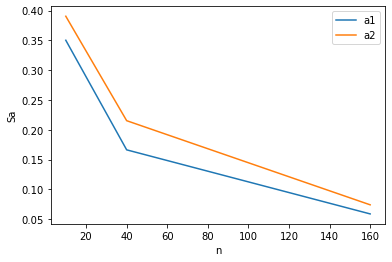

In [106]:
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

### Оценка параметра показательного распределения

In [107]:
def get_expon_samples(n):
    expon_rv = sps.expon(loc=0, scale=5)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(expon_rv.rvs(n))
    
    return np.array(all_samples)

In [108]:
def get_estmts_stats_for_num(n):
    samples = get_expon_samples(n)
    mp = np.array([n / s.sum() for s in samples])
    medians = np.log(2) / get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [109]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[ 9.17719405  4.39061359  5.30189072  0.13142588  1.20753829  6.68907564
   2.75621477  7.36519455  7.66286793  9.88877107]
 [ 4.02194119  2.03507175  3.75448239  0.47035862  5.61040393  4.71196014
   0.65256921  0.11124858  7.09103105 13.17466062]
 [ 5.94274035  6.13137345 11.76431733  5.11313076  4.03287503 22.28236119
   1.4254997   6.69407114  1.71178573  7.97754078]
 [ 3.27922844  2.63410427  9.93649511  7.30669685  3.66978466  1.24173805
   4.94107899  0.75178891  1.86411911  8.5068656 ]
 [ 7.79477253  4.88433172  0.77187149  1.35663508 13.54165375 11.08430065
   3.15450623  0.552117    2.77659007  1.29106968]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [0.18324823 0.24018988 0.1368444  0.22659346 0.21182918 0.12737575
 0.25574241 0.13589514 0.27856928 0.20635672 0.30510587 0.21757369
 0.33322686 0.19956136 0.17062226 0.14564262 0.26449193 0.14918043
 0.20909402 0.12009085]
Медианные оценки:  [0.11561156 0.17826888 0.11481541 0.19949514 0.23373324 0.1